In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np

In [2]:
num_influencers = 1
num_consumer_producers = 10

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    func = lambda x: inverse_decay(x, 1, 2)
    #consumer_producer = ConsumerProducer(func, 10, 15, 1, init_following_rates_method='equal')
    consumer_producer = ImperfectConsumerProducer(func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(20, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

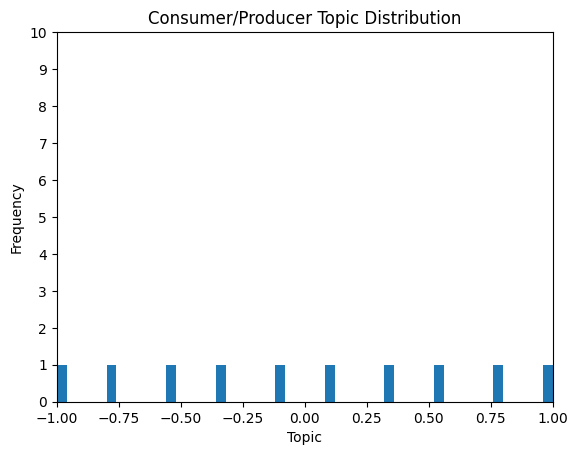

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

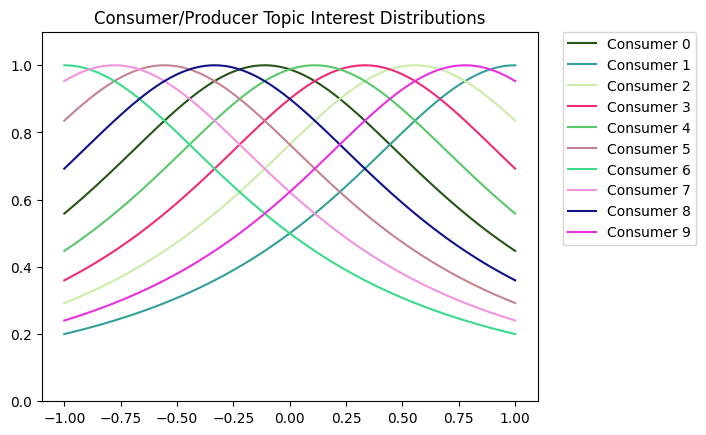

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer/Producer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

In [10]:
consumer_stats, producer_stats, influencer_stats, total_stats, average_stats = content_market.optimize(production_rate, external_production_rate, 100)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optimizing for influencer 10 under imperfect producer 0
Optim

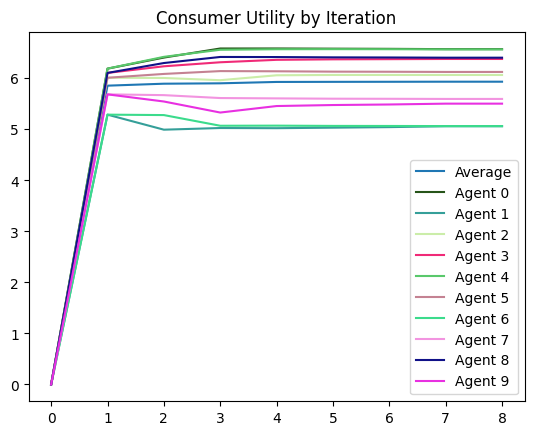

In [11]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, consumer_stats, average_stats['consumer_utilities'])

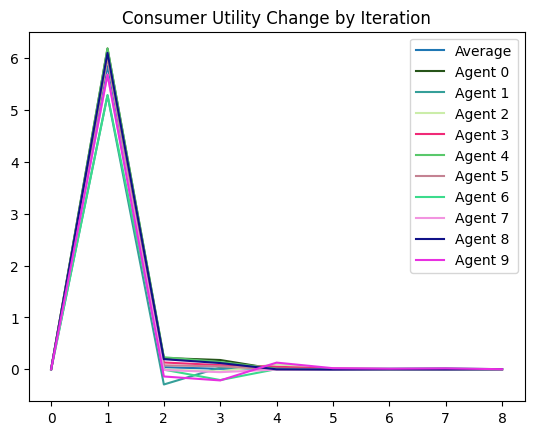

In [12]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, consumer_stats, average_stats['consumer_utility_change'])

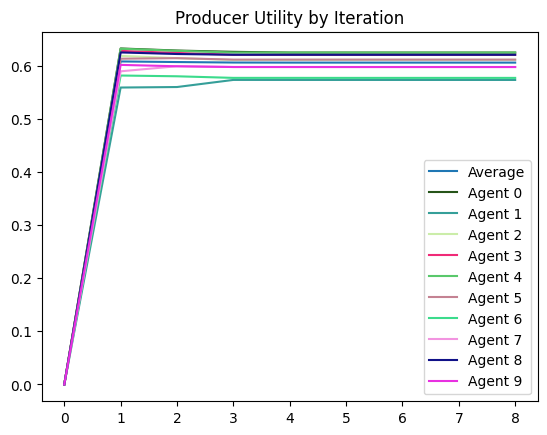

In [13]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, producer_stats, average_stats['producer_utilities'])

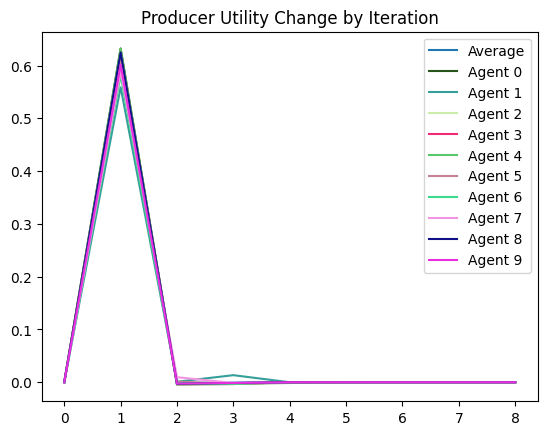

In [14]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, producer_stats, average_stats['producer_utility_change'])

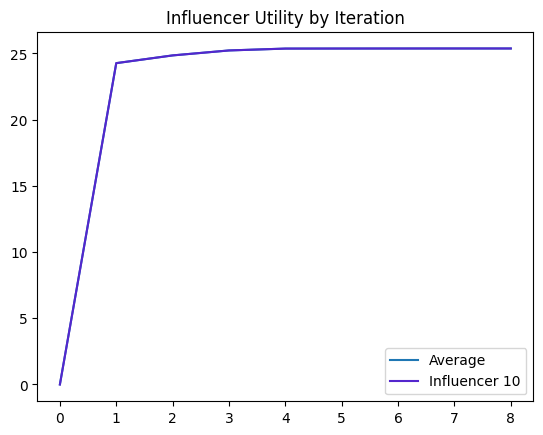

In [15]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, influencer_stats, average_stats['influencer_utilities'])

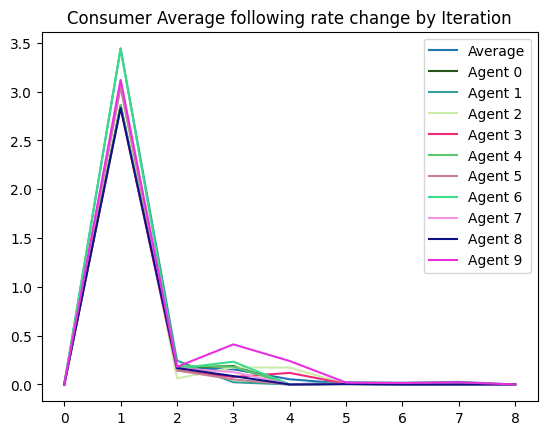

In [16]:
visualize.plot_agent_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, consumer_stats, average_stats['consumer_rate_change'])

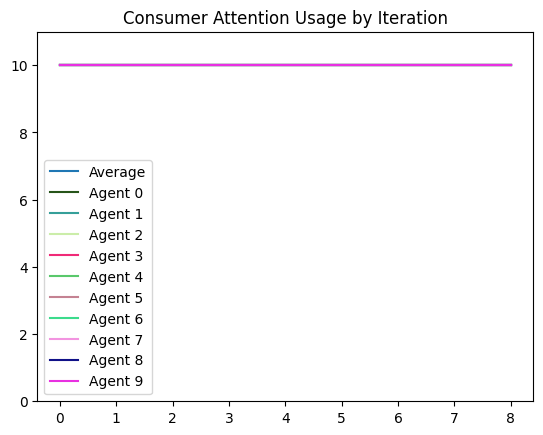

In [17]:
visualize.plot_agent_attention_used_by_iteration("Consumer Attention Usage by Iteration", content_market.consumers, agent_colors, consumer_stats, average_stats['consumer_attention_used'])


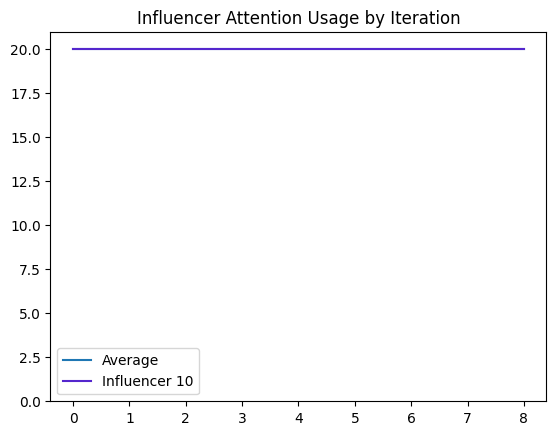

In [18]:
visualize.plot_agent_attention_used_by_iteration("Influencer Attention Usage by Iteration", content_market.influencers, agent_colors, influencer_stats, average_stats['influencer_attention_used'])

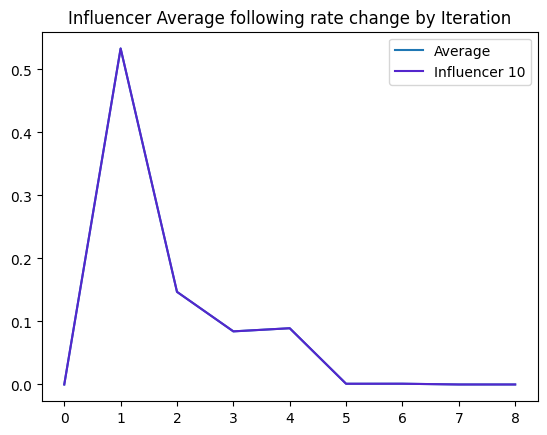

In [19]:
visualize.plot_agent_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, influencer_stats, average_stats['influencer_rate_change'])

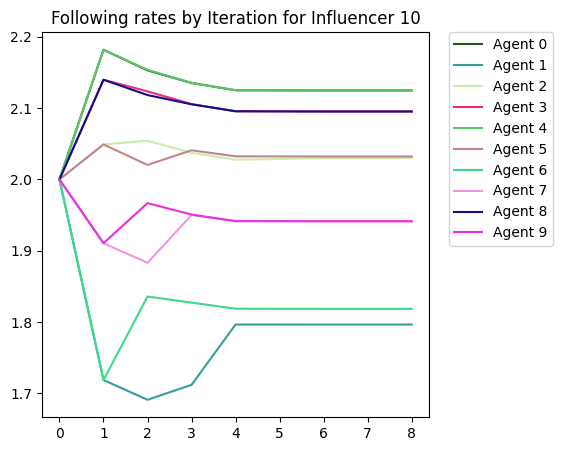

In [20]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, influencer_stats)

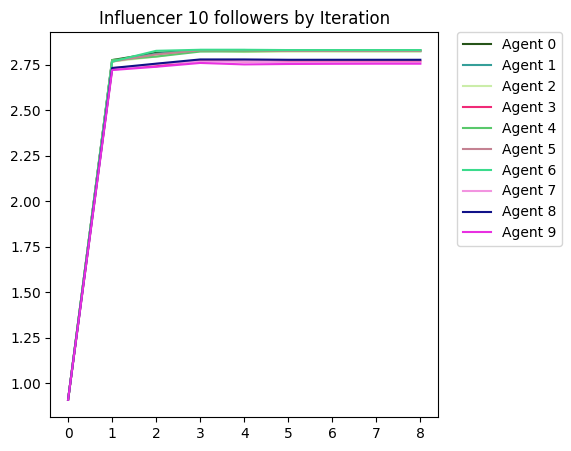

In [21]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, consumer_stats)

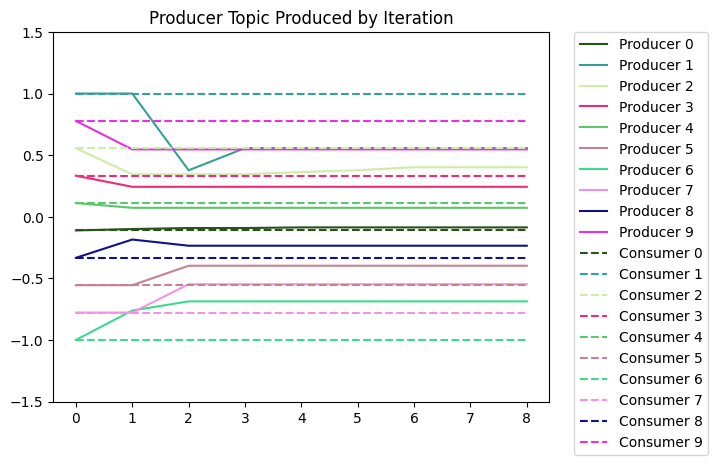

In [22]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, producer_stats)

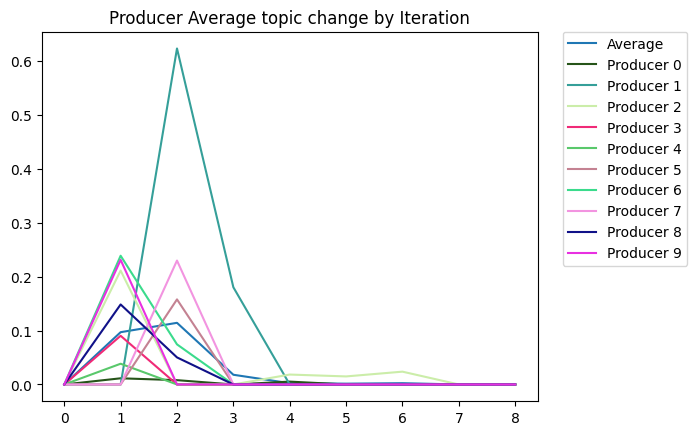

In [23]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, producer_stats, average_stats['producer_topic_change'])

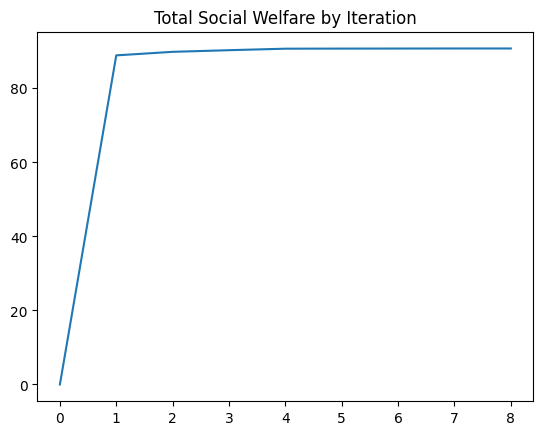

90.76862573188669


In [24]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", total_stats['social_welfare'])
print(total_stats['social_welfare'][-1])

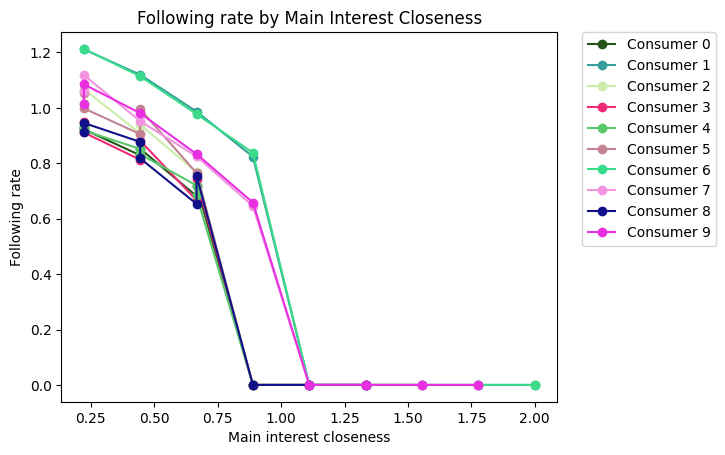

In [25]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, consumer_stats)

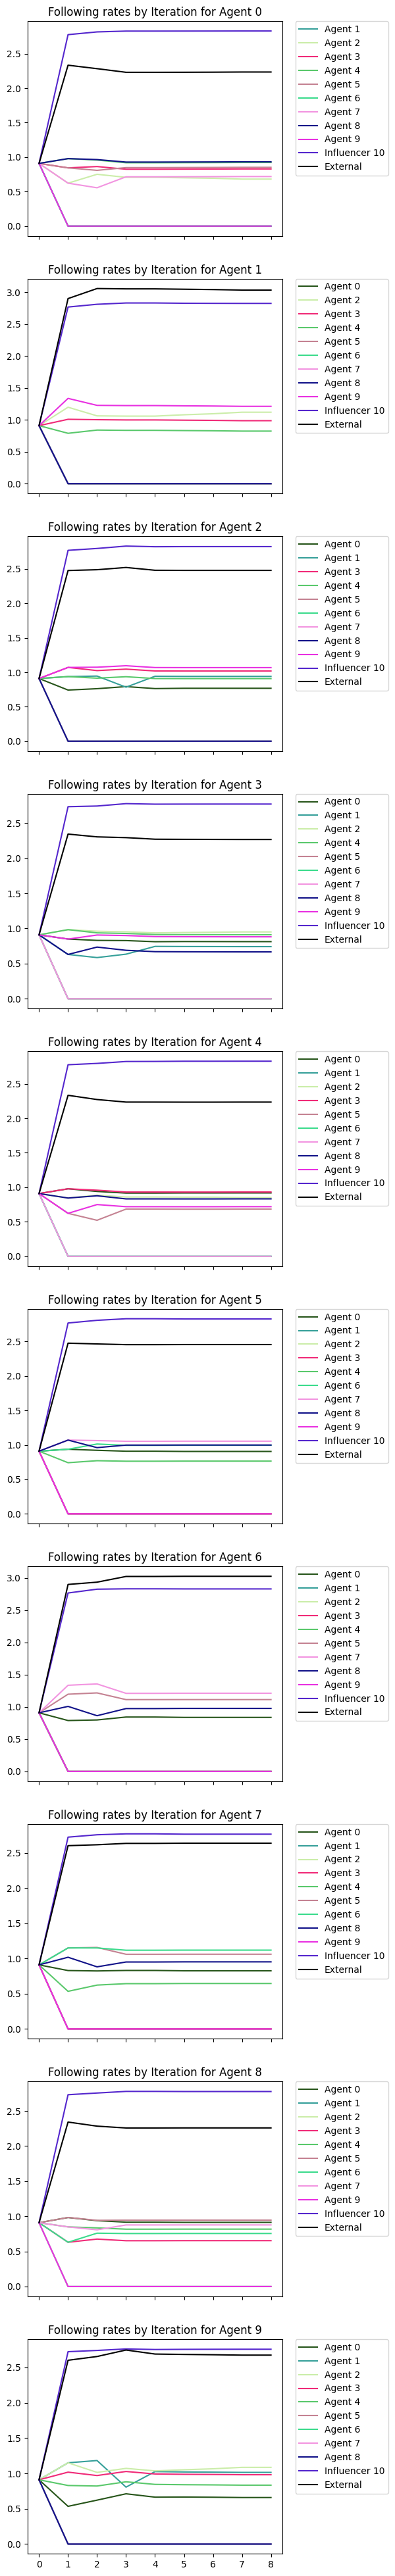

In [26]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, consumer_stats)